

## Lab 2

# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

## Question 1
Read the dataset given in file named 'bigcity.csv'.

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats

bigcity = pd.read_csv("bigcity.csv")

#Getting rid of the first column
bigcity=bigcity.iloc[:,1:3]
print(bigcity)
print(bigcity.shape)

      u    x
0   138  143
1    93  104
2    61   69
3   179  260
4    48   75
5    37   63
6    29   50
7    23   48
8    30  111
9     2   50
10   38   52
11   46   53
12   71   79
13   25   57
14  298  317
15   74   93
16   50   58
17   76   80
18  381  464
19  387  459
20   78  106
21   60   57
22  507  634
23   50   64
24   77   89
25   64   77
26   40   60
27  136  139
28  243  291
29  256  288
30   94   85
31   36   46
32   45   53
33   67   67
34  120  115
35  172  183
36   66   86
37   46   65
38  121  113
39   44   58
40   64   63
41   56  142
42   40   64
43  116  130
44   87  105
45   43   61
46   43   50
47  161  232
48   36   54
(49, 2)


## Question 2

Print statistics of the dataset and read 10 samples. Use describe() to get the statistics

In [19]:
print(bigcity.describe())

                u           x
count   49.000000   49.000000
mean   103.142857  127.795918
std    104.405061  123.121211
min      2.000000   46.000000
25%     43.000000   58.000000
50%     64.000000   79.000000
75%    120.000000  130.000000
max    507.000000  634.000000


In [20]:
bigcity.head(10)

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


## Question 3 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe


In [47]:
bigcity["X"] = bigcity["u"]
bigcity["Y"] = bigcity["x"]
bigcity_Transformed = bigcity.iloc[:,2:4]
print(bigcity_Transformed)
print(bigcity_Transformed.shape)

      X    Y
0   138  143
1    93  104
2    61   69
3   179  260
4    48   75
5    37   63
6    29   50
7    23   48
8    30  111
9     2   50
10   38   52
11   46   53
12   71   79
13   25   57
14  298  317
15   74   93
16   50   58
17   76   80
18  381  464
19  387  459
20   78  106
21   60   57
22  507  634
23   50   64
24   77   89
25   64   77
26   40   60
27  136  139
28  243  291
29  256  288
30   94   85
31   36   46
32   45   53
33   67   67
34  120  115
35  172  183
36   66   86
37   46   65
38  121  113
39   44   58
40   64   63
41   56  142
42   40   64
43  116  130
44   87  105
45   43   61
46   43   50
47  161  232
48   36   54
(49, 2)


In [104]:
#X1=np.array(bigcity_Transformed["X"]).reshape(-1,1)
#Y1=np.array(bigcity_Transformed["Y"])

X=bigcity_Transformed[["X"]]
Y=bigcity_Transformed[["Y"]]


## Question 4- Check the dataset for any missing values

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [105]:
bigcity_Transformed.isna()

,X,Y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


## Question 5 print out the correlation matrix 

In [106]:
bigcity_Transformed.corr()

,X,Y
X,1.000000,0.981742
Y,0.981742,1.000000


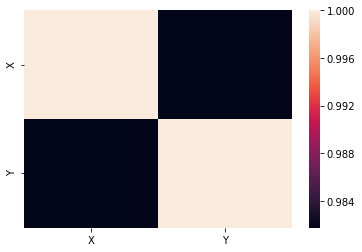

In [107]:
import seaborn as sns
sns.heatmap(bigcity_Transformed.corr())

## Question 6 - Plot a pairplot and mention your inference

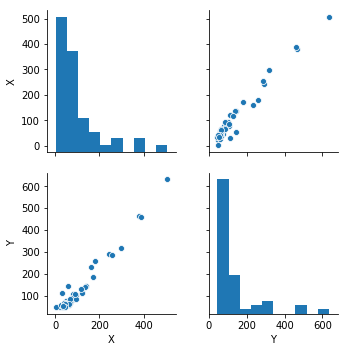

In [108]:
sns.pairplot(bigcity_Transformed)

### The high correlation betwen X and Y indicates that the variable X is a good predictor of variable Y

## Question 7 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(39, 1) (10, 1)
(39, 1) (10, 1)


## Question 8 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

In [113]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train, Y_train)

# print intercept 
print("intercept_=",lm.intercept_)


intercept_= [9.71845532]


In [114]:
#print coefficients
print("coef_=",lm.coef_)

coef_= [[1.15945123]]


Check: coef_ and intercept_ functions can help you get coefficients & intercept

## Question 9 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

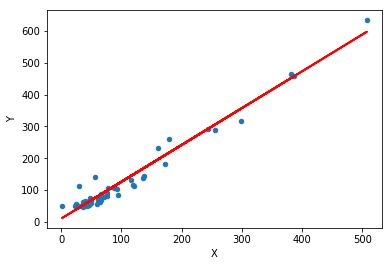

In [126]:
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

preds = lm.predict(X)

# first, plot the observed data
bigcity_Transformed.plot(kind='scatter', x='X', y='Y')

# then, plot the least squares line
plt.plot(X, preds, c='red', linewidth=2)


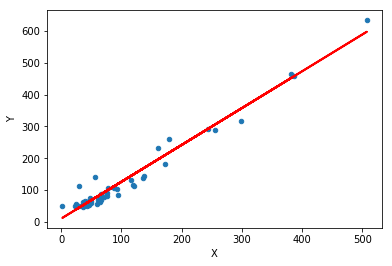

In [128]:
bigcity_Transformed.plot(kind='scatter', x='X', y='Y')

preds=lm.predict(X_train)
plt.plot(X_train, preds, c='red', linewidth=2)

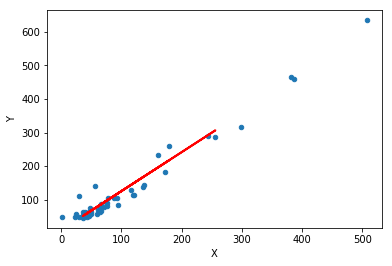

In [129]:
bigcity_Transformed.plot(kind='scatter', x='X', y='Y')

preds=lm.predict(X_test)
plt.plot(X_test, preds, c='red', linewidth=2)

## Question 10 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [130]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_pred = lm.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
print("mse=",mse)
rmse = sqrt(mse)
print("rmse=",rmse)

r2score = r2_score(Y_test, y_pred)
print("r2score",r2score)


mse= 546.869224903266
rmse= 23.385235190249123
r2score 0.9181922560396981


## Question 11 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [117]:
lm.score(X_train, Y_train)

0.9682175540860046

In [118]:
lm.score(X_test, Y_test)

0.9181922560396981

# So the model explains 91% of the variability in Y using X